In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [65]:
input_filename='data_100.dat' # matrix A
output_filename = 'output.txt' # optimal solution

input_file = open(input_filename, 'r')
data = [line[:-1].split() for line in input_file.readlines()]
data = [list(map(lambda x: float(x), line)) for line in data]
data=np.array(data)

In [66]:
output_file = open(output_filename, 'r')
res = [line[:-1].split() for line in output_file.readlines()]

In [68]:
assigned_clusters = [line.index('1') for line in res]
clustered_data=dict.fromkeys(set(assigned_clusters))
clustered_data_indices = dict.fromkeys(set(assigned_clusters))
for i, point in enumerate(data):
    cl = assigned_clusters[i]
    if clustered_data[cl] is None:
        clustered_data[cl] = []
        clustered_data_indices[cl] = []
    clustered_data[cl].append(list(point))
    clustered_data_indices[cl].append(i)
clustered_data_indices = [c[1] for c in clustered_data_indices.items()]
cluster_centers = data[list(set(assigned_clusters))]

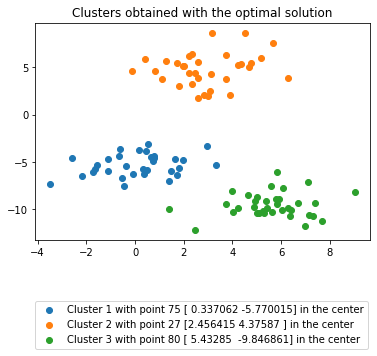

In [69]:
plt.figure()
clustered_data_items = list(clustered_data.items())
clustered_data_items.sort(key=lambda l: l[1][0])
for i, cluster in enumerate(clustered_data_items):
    cluster_index = cluster[0]
    series=np.array(cluster[1])
    line = plt.scatter(x=series[:,0],y=series[:,1])
    line.set_label(f'Cluster {i+1} with point {cluster_index+1} {data[cluster_index]} in the center')
#plt.scatter(x=cluster_centers[:,0],y=cluster_centers[:,1])
plt.title('Clusters obtained with the optimal solution')
plt.legend(loc=(0,-0.5))
plt.show()

In [70]:
#reading spanning tree output
heuristic_output_filename = 'spanning_tree_result.txt'
heuristic_cluster_indices = []
with open(heuristic_output_filename, 'r') as heuristic_f:
    lines = heuristic_f.readlines()
    heuristic_cluster_indices = [[int(x) for x in l.split()] for l in lines]
print(heuristic_cluster_indices)
heuristic_cluster_indices.sort(key=lambda l: l[0])

[[0, 1, 7, 13, 14, 21, 23, 30, 34, 35, 36, 40, 42, 43, 48, 51, 54, 57, 62, 63, 64, 67, 68, 69, 74, 84, 86, 88, 89, 93, 94, 95], [3, 6, 9, 10, 16, 18, 20, 24, 29, 33, 41, 45, 46, 47, 49, 52, 53, 55, 58, 59, 65, 66, 71, 77, 78, 79, 80, 82, 87, 90, 91, 92, 97, 98, 99], [2, 4, 5, 8, 11, 12, 15, 17, 19, 22, 25, 26, 27, 28, 31, 32, 37, 38, 39, 44, 50, 56, 60, 61, 70, 72, 73, 75, 76, 81, 83, 85, 96]]


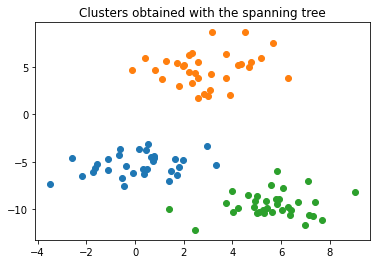

In [71]:
heurisic_clusters_points = [[data[i] for i in l] for l in heuristic_cluster_indices]

plt.figure()
for cluster in heurisic_clusters_points:
    series=np.array(cluster)
    line = plt.scatter(x=series[:,0],y=series[:,1])
#plt.scatter(x=cluster_centers[:,0],y=cluster_centers[:,1])
plt.title('Clusters obtained with the spanning tree')
plt.show()

In [72]:
### Comparing both solutions
clustered_data_indices.sort(key=lambda l: l[0])
heuristic_cluster_indices.sort(key=lambda l: l[0])
for c_opt, c_heuristic in zip(clustered_data_indices, heuristic_cluster_indices):
    print(f"Are the clusters identical? {c_opt == c_heuristic}")
    print(f"Cluster size: {len(c_opt)}")
    print(f"Points in cluster, starting at i=1: {[i+1 for i in c_opt]}")
    

Are the clusters identical? True
Cluster size: 32
Points in cluster, starting at i=1: [1, 2, 8, 14, 15, 22, 24, 31, 35, 36, 37, 41, 43, 44, 49, 52, 55, 58, 63, 64, 65, 68, 69, 70, 75, 85, 87, 89, 90, 94, 95, 96]
Are the clusters identical? True
Cluster size: 33
Points in cluster, starting at i=1: [3, 5, 6, 9, 12, 13, 16, 18, 20, 23, 26, 27, 28, 29, 32, 33, 38, 39, 40, 45, 51, 57, 61, 62, 71, 73, 74, 76, 77, 82, 84, 86, 97]
Are the clusters identical? True
Cluster size: 35
Points in cluster, starting at i=1: [4, 7, 10, 11, 17, 19, 21, 25, 30, 34, 42, 46, 47, 48, 50, 53, 54, 56, 59, 60, 66, 67, 72, 78, 79, 80, 81, 83, 88, 91, 92, 93, 98, 99, 100]


In [73]:
# the clusters in the optimal and heuristic solution are identical, so the sums of distances to the cluster medians are also identical
def eucl_dist (center, items):
    sum_dist = 0
    for item in items:
        sum_dist += ((center[0]-item[0])**2+(center[1]-item[1])**2)** 0.5
    return sum_dist

sum_distances = sum([eucl_dist(data[cl[0]], cl[1]) for cl in clustered_data_items ])
print(sum_distances)

180.60961643512474
